## Importación de las librerías a usar

In [10]:
# Generación del alfabeto inglés
import string
alphabet = list(string.ascii_uppercase)
alphabet = ['!'] + alphabet

# Análisis exploratorio y estructura de la información
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from itertools import product

# Métricas de error y metodología de validación
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, train_test_split

# Para embellecer las gráficas
sns.set()


import tensorflow as tf

%matplotlib inline
%load_ext tensorboard

# from sklearn.datasets import *
# from local.lib import mlutils
# tf.__version__
import pandas as pd
import gdown



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Dataset para entrenamiento

In [11]:
df_train = gdown.download('https://drive.google.com/uc?id=1j9wYmC-gjh2p7o4skayM1tgPFo2lzZb9', 'data.csv', quiet=False); df_train = pd.read_csv('data.csv')


Downloading...
From: https://drive.google.com/uc?id=1j9wYmC-gjh2p7o4skayM1tgPFo2lzZb9
To: /content/data.csv
100%|██████████| 39.1M/39.1M [00:00<00:00, 222MB/s]


In [12]:
df_train.empty

False

In [13]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

In [14]:
np.array(X_train.iloc[1000]).reshape(28,28)

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255,   7,   1, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 254, 254, 208, 254, 254, 254, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 254,  46, 255, 253, 254,   1, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        254, 254, 255, 255,   1,   0, 255, 118, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
          0, 255,   1, 253, 255,   1, 255, 254, 255, 255, 255, 255, 255,
        255, 255],
       [25

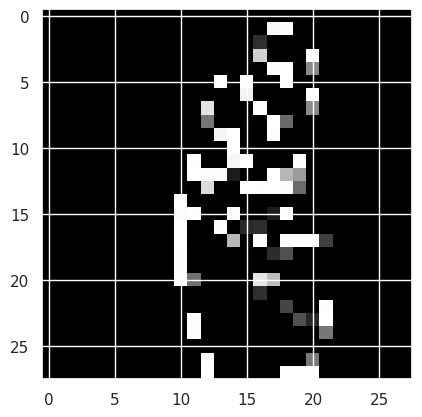

In [15]:
plt.imshow(np.array(X_train.iloc[1000]).reshape((28,28)), cmap="binary")
plt.show()


## Dataset para test

In [16]:
df_test = gdown.download('https://drive.google.com/uc?id=1sPxsIUC4FlxiOaF7jcDc19L-cSsl9Ul9', 'data.csv', quiet=False); df_train = pd.read_csv('data.csv')
df_test = pd.read_csv('data.csv')

# Check for NaN values in the 'label' column in the test dataset
print("Number of NaN values in 'label' column in df_test before dropping:", df_test.label.isna().sum())

# Drop rows where the 'label' is NaN specifically from the test dataframe
df_test.dropna(subset=['label'], inplace=True)

# Re-check for NaN values (should be 0 if any were dropped)
print("Number of NaN values in 'label' column in df_test after dropping:", df_test.label.isna().sum())

# Convert the 'label' column to integer type after dropping NaNs
df_test['label'] = df_test['label'].astype(int)

X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

Downloading...
From: https://drive.google.com/uc?id=1sPxsIUC4FlxiOaF7jcDc19L-cSsl9Ul9
To: /content/data.csv
100%|██████████| 13.0M/13.0M [00:00<00:00, 173MB/s]


Number of NaN values in 'label' column in df_test before dropping: 0
Number of NaN values in 'label' column in df_test after dropping: 0


In [17]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

## Redimensionamiento
Hasta este punto, cada imagen se representa como un vector, sin embargo, dado que en el modelo de red neuronal convolucional nos interesa extraer información sobre la relación de un pixel con su alrededor, crearemos un nuevo dataset redimensionado para este modelo.

Se escalan los conjuntos $X_{train}$ y $X_{test}$ con `MinMaxScaler` en base a $X_{train}$

In [18]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [19]:
X_train_scaled_2d = np.reshape(np.array(X_train_scaled), (X_train_scaled.shape[0],28,28))
y_train_array = np.array(y_train)

X_test_scaled_2d = np.reshape(np.array(X_test_scaled), (X_test_scaled.shape[0],28,28))
y_test_array = np.array(y_test)

image = X_train_scaled_2d[1000]

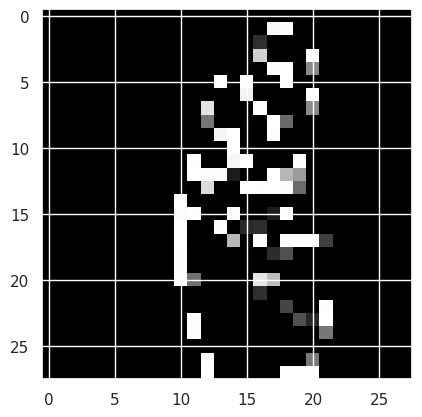

In [20]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the image
ax.imshow(image, cmap='binary')

# Show the plot
plt.show()